In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crop_production.csv")

In [3]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


# <h3>Baisc information about data</h3>

In [4]:
df.shape

(246091, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
#checking null values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
#sns.histplot(df.isnull().sum())  -- we can use histplot to show the null value in the dataset

In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
# drop the NULL values from Production column
df.dropna(inplace=True)

In [10]:
df.describe(include='all')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,242361,242361,242361.000000,242361,242361,2.423610e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,TUMKUR,NaN,Kharif,Rice,NaN,NaN
freq,33189,931,NaN,94283,15082,NaN,NaN
mean,NaN,NaN,2005.625773,NaN,NaN,1.216741e+04,5.825034e+05
std,NaN,NaN,4.958285,NaN,NaN,5.085744e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,1.000000e-01,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.700000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,6.030000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.545000e+03,7.023000e+03


# Objective

# <h4>
*Find the crop production information through:
1. State wise crop production
2. District wise crop production
3. Year wise crop production
4. Crop wise crop production
5. Area wise crop production
6. In which Season there have more crop production

*Crop Category wise crop production
1. State wise 'General' category crop productions
2. State wise Commercial category crop production
3. State wise Vegetables category crop production
4. State wise Fruits category crop production
5. State wise Pulses category crop production
</h4>


# <h4>
*Different Seasons:
1. Kharif: Kharif crops are sown early-May – usually at the beginning of the first monsoon rains
2. Rabi: Rabi crops are sown around mid-November – preferably after the monsoon rains.
3. Whole Year: Throughout the Year.
4. Summer: April to June
5. Winter: December to January
6. Autumn: September and October
</h4>


# EDA (Exploratory Data Analysis)

In [11]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


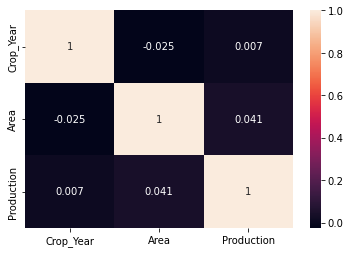

In [12]:
#checking the correlation between the variable which are dependent upon each other
#It clearly shows the relationships between the variables
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
# sns.histplot(df.Crop_Year)
# plt.show()

In [14]:
# sns.boxplot(df.Production)
# plt.show()

# <h3>1. State wise crop production</h3>

In [15]:
scp=df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

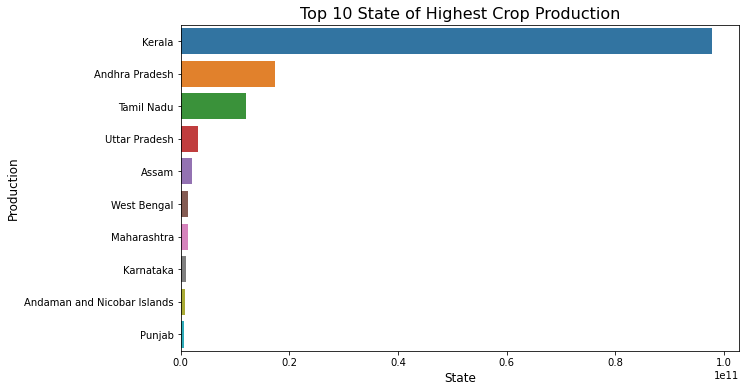

In [16]:
plt.figure(figsize=(10,6))    
plt.title("Top 10 State of Highest Crop Production",fontsize=16)
p=sns.barplot(y=scp.State_Name,x=scp.Production)
plt.xlabel('State',fontsize=12)
plt.ylabel('Production',fontsize=12)
plt.show()
# for i in p.containers:
#     p.bar_label(i,padding=-1)

# <h4>
Conclusion:
* Kerala has the highest crop production in India
* Andhra Preadesh in 2nd Position
* Tamil Nadu in 3rd position
</h4>

In [17]:
slcp=df.groupby('State_Name')['Production'].sum().sort_values(ascending=True).reset_index().head(10)

In [18]:
# plt.figure(figsize=(12,6))    
# plt.title("Lowest 5 State Crop Production",fontsize=16)
# p=sns.barplot(x=slcp.State_Name,y=slcp.Production)
# plt.xlabel('State',fontsize=12)
# plt.ylabel('Production',fontsize=12)

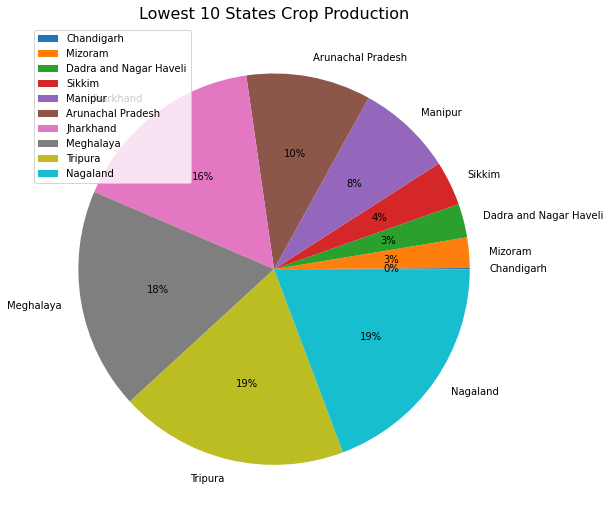

In [19]:
plt.figure(figsize=(16,9))
plt.title("Lowest 10 States Crop Production",fontsize=16)
plt.pie(slcp.Production,labels=slcp.State_Name,autopct='%0.0f%%')
plt.legend()
plt.show()

# <h3>2. District wise crop production</h3>

In [20]:
dcp=df.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

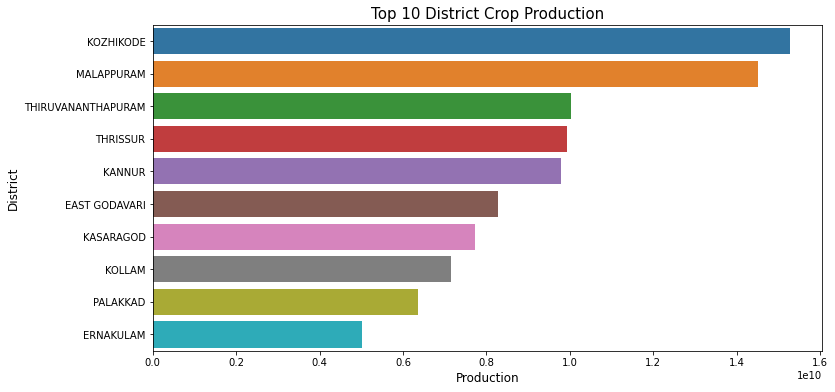

In [21]:
plt.figure(figsize=(12,6))
plt.title("Top 10 District Crop Production",fontsize='15')
sns.barplot(y=dcp.District_Name,x=dcp.Production)
plt.xlabel('Production',fontsize='12')
plt.ylabel('District',fontsize='12')
plt.show()

# <h4>
Conclusion:
* Kozhikode in 1st position
* Malappuram in 2nd position
* Thiruvananthapuram in 3rd position

</h4>

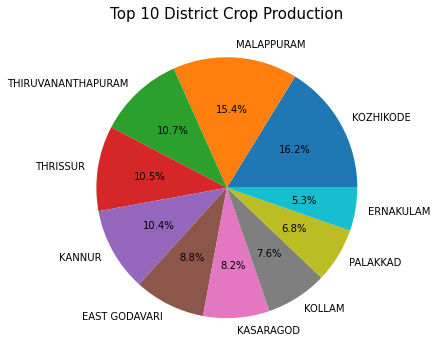

In [22]:
#using Pie plot
plt.figure(figsize=(12,6))
plt.title("Top 10 District Crop Production",fontsize='15')
plt.pie(dcp.Production,labels=dcp.District_Name,autopct='%0.1f%%')
plt.show()

In [23]:
lcp=df.groupby('District_Name')['Production'].sum().sort_values(ascending=True).reset_index().head(10)

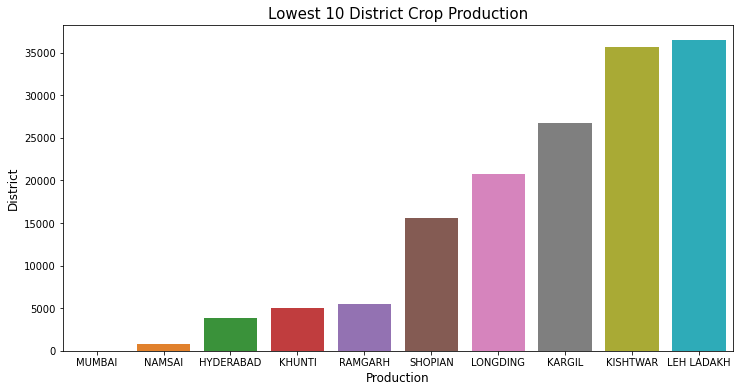

In [24]:
plt.figure(figsize=(12,6))
plt.title("Lowest 10 District Crop Production",fontsize='15')
sns.barplot(x=lcp.District_Name,y=lcp.Production)
plt.xlabel('Production',fontsize='12')
plt.ylabel('District',fontsize='12')
plt.show()

# <h3>3. Year wise crop production</h3>

In [25]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

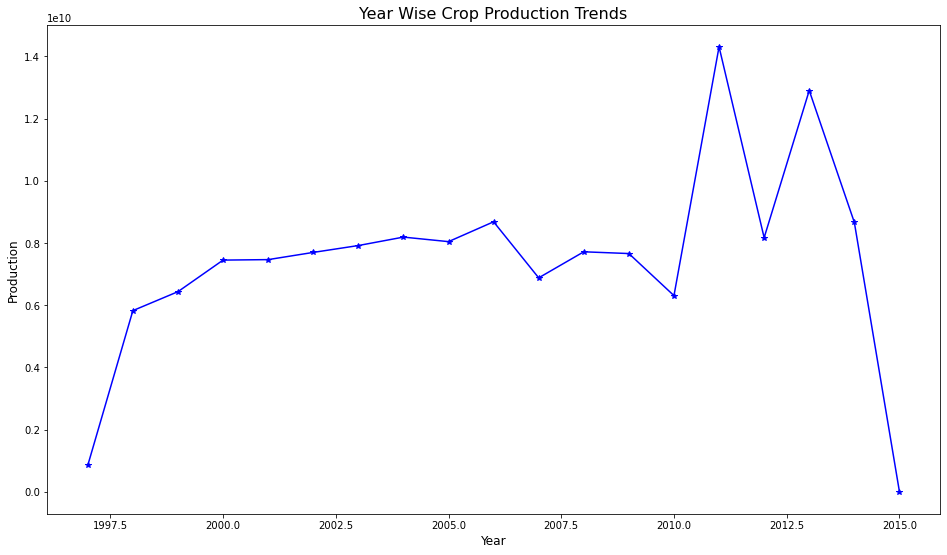

In [26]:
ycp=df.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(16,9))
plt.title('Year Wise Crop Production Trends',fontsize=16)
# sns.lineplot(ycp.Crop_Year,ycp.Production)
plt.plot(ycp.Crop_Year,ycp.Production,'b-*')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Production',fontsize=12)
plt.show()

In [27]:
ycp=df.groupby('Crop_Year')['Production'].sum().reset_index()

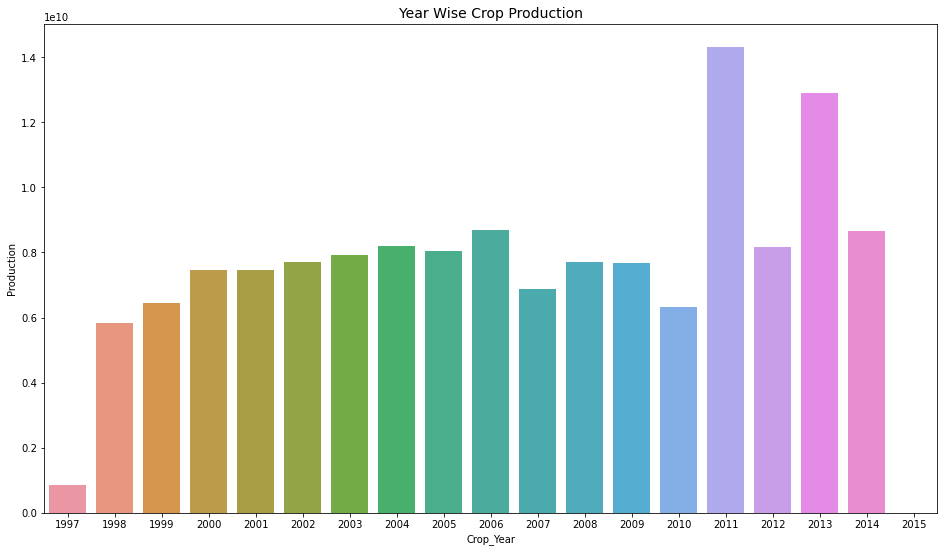

In [28]:
#using bar graph
plt.figure(figsize=(16,9))
plt.title("Year Wise Crop Production",fontsize='14')
sns.barplot(x=ycp.Crop_Year,y=ycp.Production)
plt.show()

# <h4>* 2011, 2013 and 2014 has the highest crop production</h4>

# <h3>4. Crop wise crop production</h3>

In [29]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [30]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [31]:
ccp=df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10).reset_index()

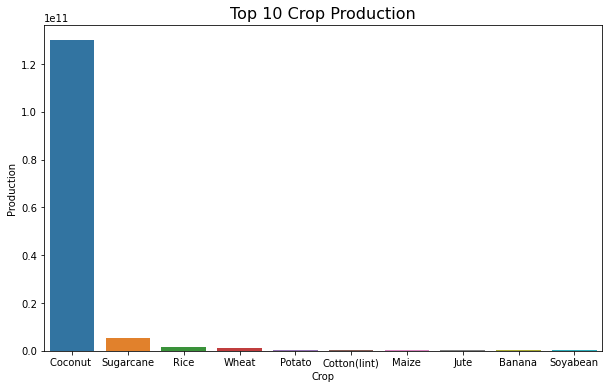

In [32]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Crop Production',fontsize=16)
sns.barplot(x=ccp.Crop,y=ccp.Production)
plt.show()

# <h4>
* Coconut has the highest production in India 
* Sugarcane has the second highest production
* Rice has the third highest production
</h4>

# <h3>4.a Coconut Production in India</h3>

In [33]:
cdf=df[df['Crop']=='Coconut ']

In [34]:
cdf

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0


C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


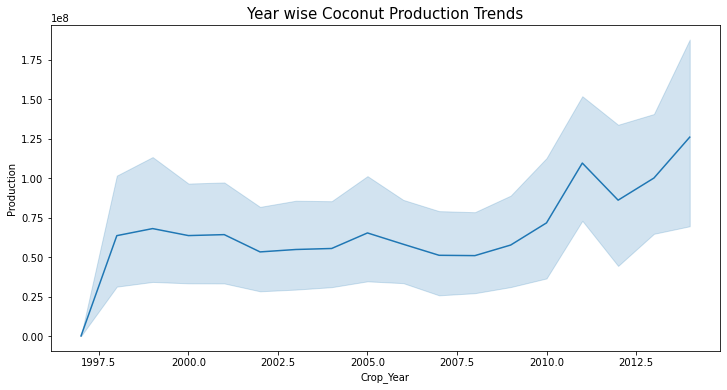

In [35]:
plt.figure(figsize=(12,6))
plt.title('Year wise Coconut Production Trends',fontsize='15')
sns.lineplot(cdf.Crop_Year,cdf.Production)
plt.show()

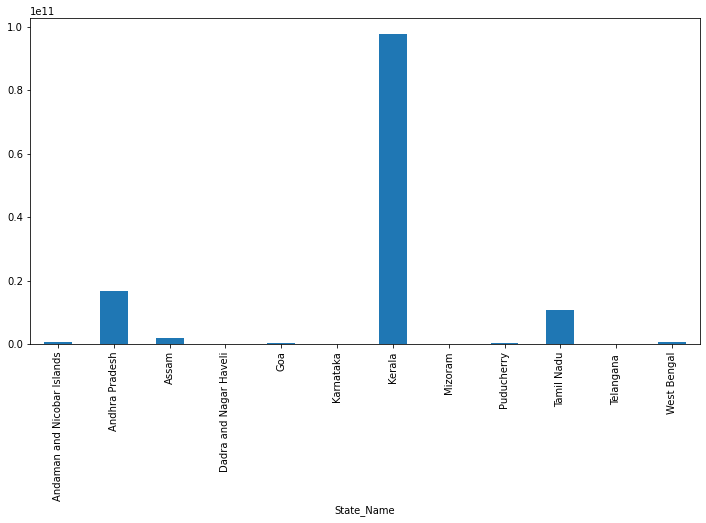

In [36]:
plt.figure(figsize=(12,6))
cdf.groupby('State_Name')['Production'].sum().plot(kind='bar')
plt.show()

# <h4>
Conclusion:
* Kerala has highest Coconut production
* Andhra Pradesh has 2nd highest
* Tamil Nadu has 3rd highest
* So, we can say that all the coastal areas has maximum number of coconut farming and as well the production
</h4>

# <h3>4.b Sugarcane Production in India</h3>

In [37]:
sdf=df[df['Crop']=='Sugarcane'].reset_index()

In [38]:
sdf.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
1,16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00
2,26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00
3,60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50
4,65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75


C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


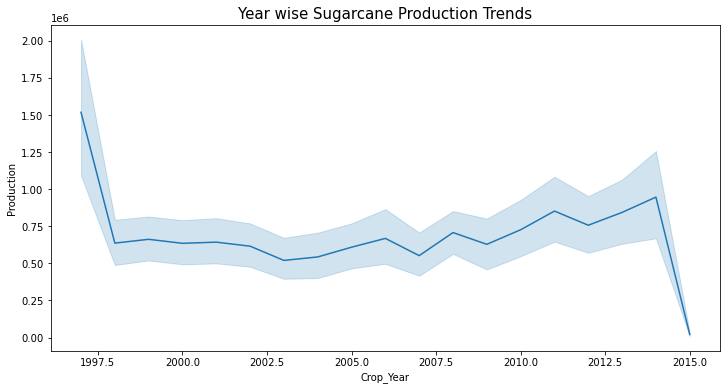

In [39]:
plt.figure(figsize=(12,6))
plt.title('Year wise Sugarcane Production Trends',fontsize='15')
sns.lineplot(sdf.Crop_Year,sdf.Production)
plt.show()

In [135]:
ssdf=sdf.groupby('State_Name')['Production'].mean().sort_values(ascending=False).reset_index().head(10)

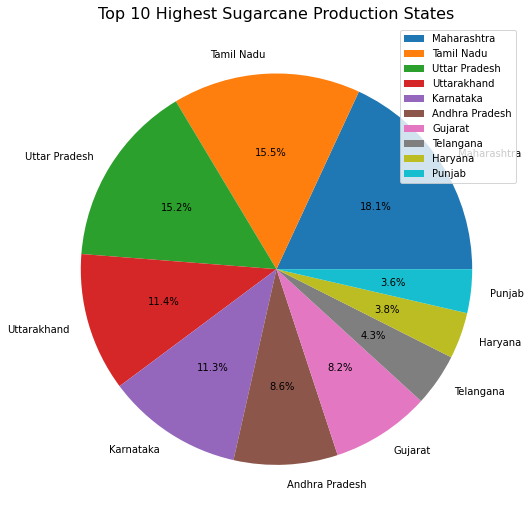

In [136]:
plt.figure(figsize=(12,9))
plt.title("Top 10 Highest Sugarcane Production States",fontsize='16')
plt.pie(ssdf.Production,labels=ssdf.State_Name,autopct='%0.1f%%')
plt.legend()
plt.show()

# <h4>
Conclusion:
* In Maharashtra has highest Sugarcane production
* Tamil Nadu in 2nd highest
* Uttar Pradesh in 3rd highest
</h4>

In [42]:
#In Uttar Pradesh which district has highest Sugarcan production

In [43]:
usdf=sdf[sdf['State_Name']=='Uttar Pradesh']

In [44]:
usdf=usdf.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

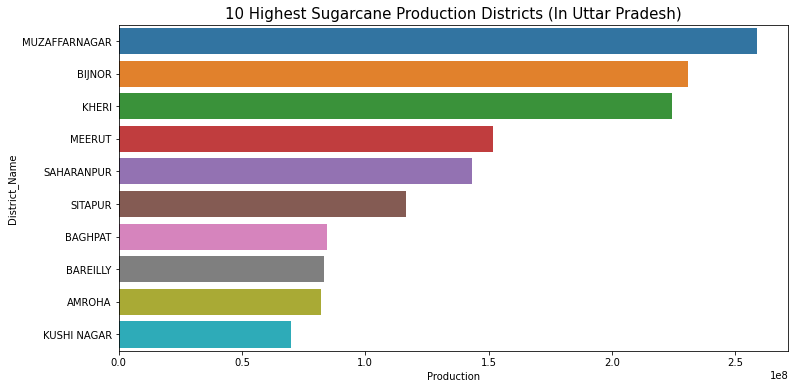

In [45]:
plt.figure(figsize=(12,6))
plt.title("10 Highest Sugarcane Production Districts (In Uttar Pradesh)",fontsize='15')
sns.barplot(x=usdf.Production,y=usdf.District_Name)
plt.show()

In [139]:
tsdf=sdf[sdf['State_Name']=='Tamil Nadu'].reset_index()

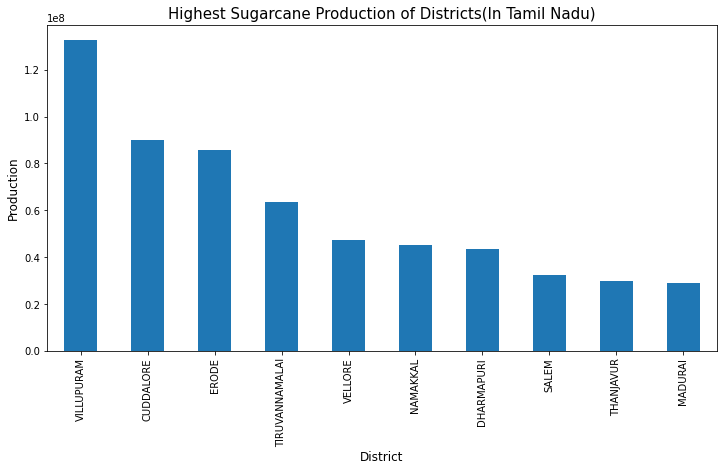

In [147]:
plt.figure(figsize=(12,6))
plt.title('Highest Sugarcane Production of Districts(In Tamil Nadu)',fontsize='15')
tsdf.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('District',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

# <h3>4.c Rice Production in India</h3>

In [46]:
rdf=df[df['Crop']=='Rice'].reset_index()

In [47]:
rdf.head()

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
1,12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
2,18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
3,27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
4,36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57


C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


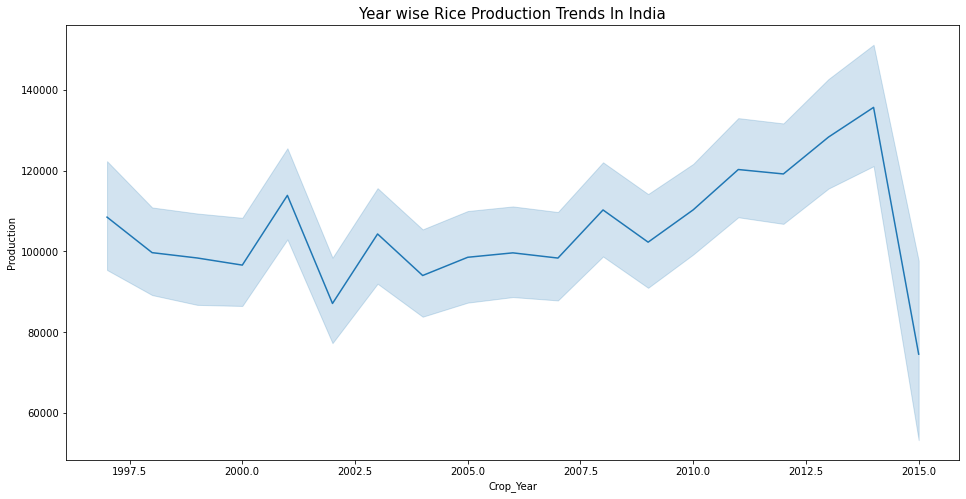

In [48]:
plt.figure(figsize=(16,8))
plt.title('Year wise Rice Production Trends In India',fontsize='15')
sns.lineplot(rdf.Crop_Year,rdf.Production)
plt.show()

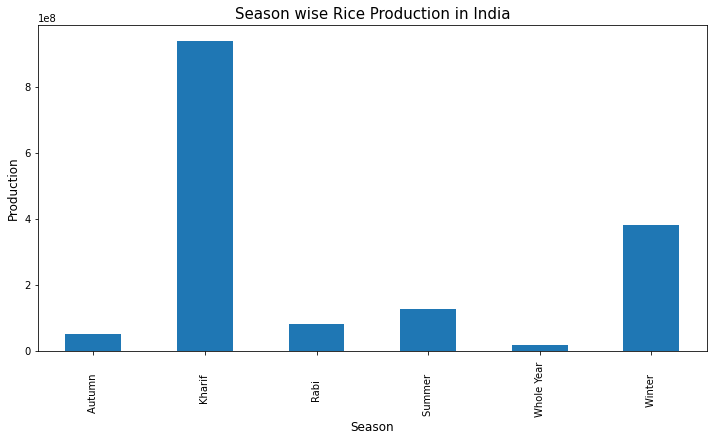

In [49]:
plt.figure(figsize=(12,6))
plt.title('Season wise Rice Production in India',fontsize='15')
rdf.groupby('Season')['Production'].sum().plot(kind='bar')
plt.xlabel('Season',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

# <h4>
Conclusion:
* In 'Kharif' season maximum rice has produced
* Then 'Winter' season has 2nd maximum rice production
</h4>

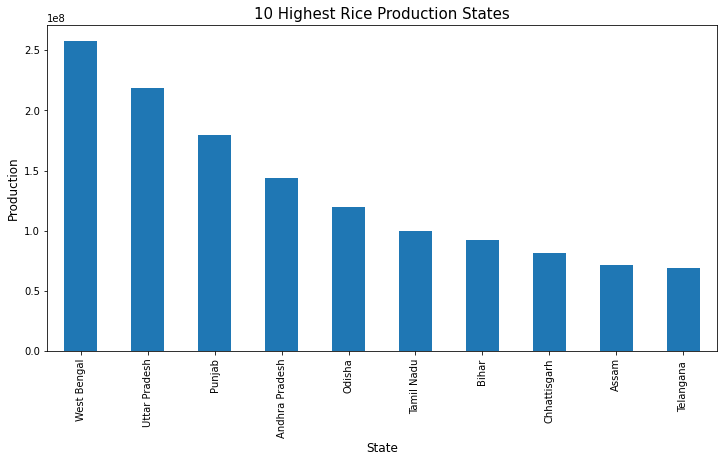

In [50]:
plt.figure(figsize=(12,6))
plt.title('10 Highest Rice Production States',fontsize='15')
rdf.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('State',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

# <h4>
Conclusion:
* West Bengal has the highest Rice Production in India
</h4>

In [51]:
#District wise Rice production in West Bengal

In [52]:
wrdf=rdf[rdf['State_Name']=='West Bengal'].reset_index()

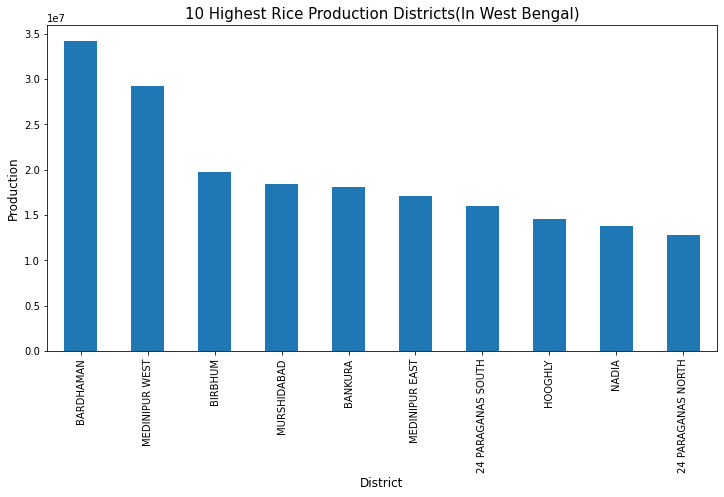

In [53]:
plt.figure(figsize=(12,6))
plt.title('10 Highest Rice Production Districts(In West Bengal)',fontsize='15')
wrdf.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('District',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

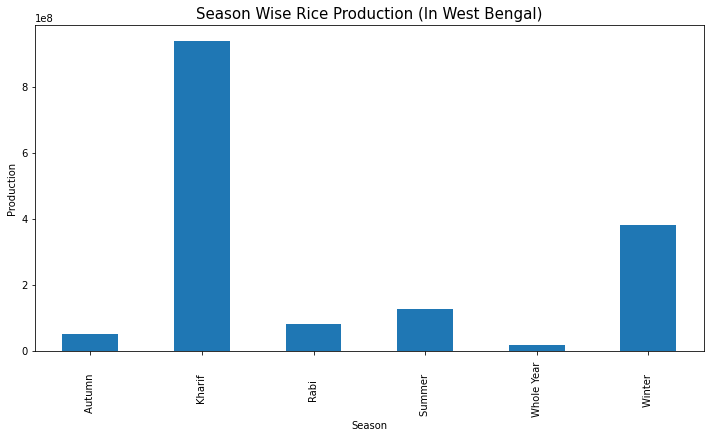

In [54]:
plt.figure(figsize=(12,6))
plt.title('Season Wise Rice Production (In West Bengal)',fontsize='15')
rdf.groupby('Season')['Production'].sum().plot(kind='bar')
plt.ylabel('Production')
plt.show()

# <h4>
    Conclusion:
    * In 'Kharif' season has the highest Rice production in West Bengal
</h4>

In [55]:
bwrdf=wrdf[wrdf['District_Name']=='BARDHAMAN']

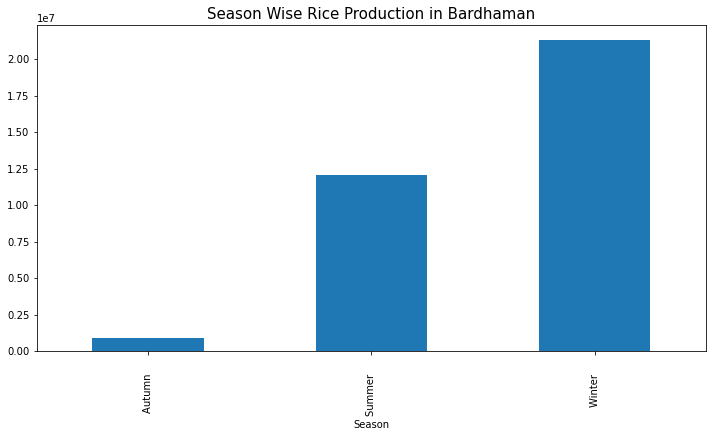

In [56]:
plt.figure(figsize=(12,6))
plt.title('Season Wise Rice Production in Bardhaman',fontsize='15')
bwrdf.groupby('Season')['Production'].sum().plot(kind='bar')
plt.show()

# <h4>
* In Barddhaman 'Winter' season has maximum rice production</h4>

# <h3>5. Area wise crop production in every States</h3>

In [57]:
acp=df.groupby('State_Name')['Area'].sum().sort_values(ascending=False).reset_index().head(10)

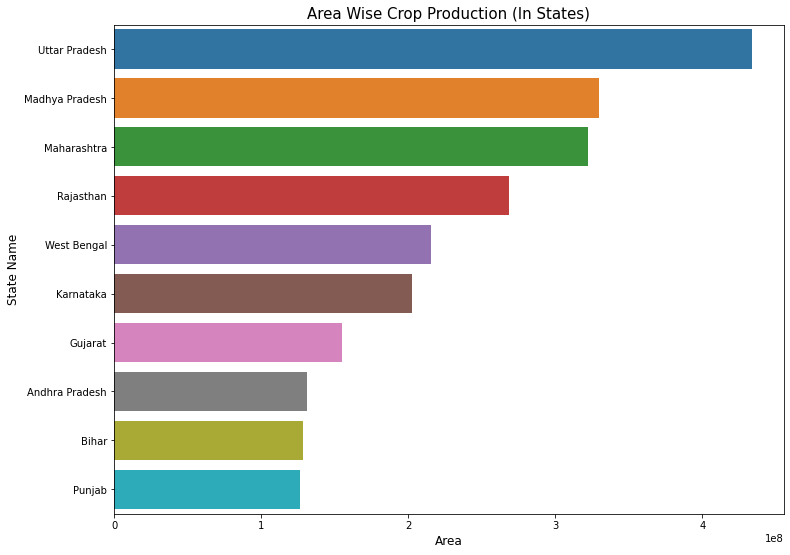

In [58]:
plt.figure(figsize=(12,9))
plt.title("Area Wise Crop Production (In States)",fontsize='15')
sns.barplot(x=acp.Area,y=acp.State_Name)
plt.xlabel('Area',fontsize='12')
plt.ylabel('State Name',fontsize='12')
plt.show()

# <h4>
Conclusion:
* In Uttar Prades highest area have used for crop production
* Madhya Pradesh has 2nd highest 
* Maharashtra has 3rd highest
</h4>

# <h3>6. In which Season there have more crop production  </h3>

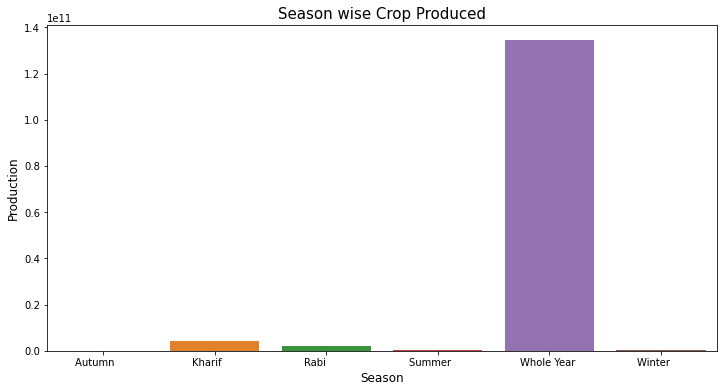

In [59]:
scp=df.groupby('Season')['Production'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.title("Season wise Crop Produced",fontsize='15')
sns.barplot(x=scp.Season,y=scp.Production)
plt.xlabel('Season',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

In [60]:
df[df.Production==df[df.Crop=='Rice']['Production'].max()]['State_Name']

164232    Punjab
Name: State_Name, dtype: object

In [61]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [62]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [134]:
# through every season how many crop are produced
df.groupby('Season')['Crop'].count()

Season
Autumn          4930
Kharif         94283
Rabi           66160
Summer         14811
Whole Year     56127
Winter          6050
Name: Crop, dtype: int64

In [126]:
r=df[df['Crop']=='Rice'].reset_index()

In [133]:
l=r.Season.unique().tolist()
print("Rice produced through the season:")
for i in l:
    print(i)

Rice produced through the season:
Kharif     
Autumn     
Rabi       
Whole Year 
Summer     
Winter     


# <h3>* Crop Category wise crop production</h3>

In [63]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [64]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [65]:

def crop_cat(crop):
    for i in ['Rice','Maize','Wheat','Barley','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar','Paddy']:
        if crop==i:
            return 'General'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor','Other Kharif pulses','other misc. pulses','Ricebean (nagadal)','Rajmash Kholar',
              'Lentil','Samai','Korra','Copea(Lobia)''Other Rabi pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
              'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange','Pome Fruit','Citrus Fruit',
              'Other Fresh Fruits','Mange','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd',
             'Pump Kin','Redish','Snak Guard','Bottle Gourd','Bitter Gourd','Cucumber','Drum Stick','Cauliflower',
             'Beans & Mutter(Vegetable)','Cabbage','Bhindi','Tomato','Brinjal','Khesari','Sweet potato',
             'Potato','Onion','Tapioca','Colocosia']:
        if crop==i:
            return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander',
             'Turmeric','Dry chillies']:
        if crop==i:
              return 'Spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
              return 'Fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut',
             'Arecanut','Groundnut']:
        if crop==i:
              return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Rapeseed &Mustard','Sesamum']:
        if crop==i:
              return 'Oliseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
              return 'Commercial'


# <h5>Create a new column Crop_Category</h5>

In [66]:
df['Crop_Category']=df['Crop'].apply(crop_cat)

In [67]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Category
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,General
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [68]:

ccp=df.groupby('Crop_Category')['Production'].sum().sort_values(ascending=False).reset_index()

In [69]:
ccp

,Crop_Category,Production
0,Commercial,5.547619e+09
1,General,3.551666e+09
2,Vegetables,6.230645e+08
3,Fibres,4.914495e+08
4,Pulses,2.034008e+08
5,Fruits,1.589821e+08
6,Beans,1.587576e+08
7,Nuts,1.359093e+08
8,Oliseeds,1.293110e+08
9,Spices,5.304803e+07


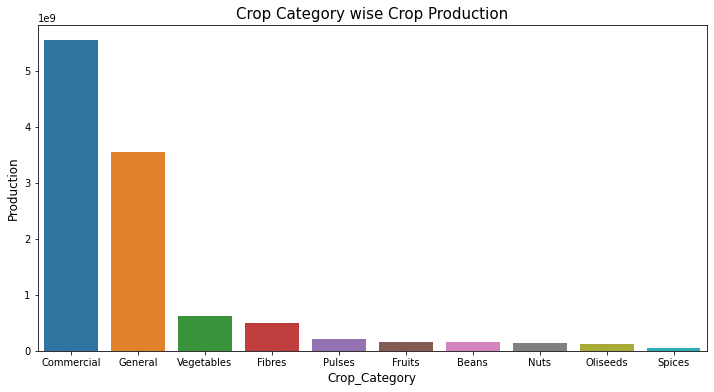

In [70]:
plt.figure(figsize=(12,6))
plt.title('Crop Category wise Crop Production',fontsize='15')
sns.barplot(y=ccp.Production,x=ccp.Crop_Category)
plt.xlabel('Crop_Category',fontsize='12')
plt.ylabel('Production',fontsize='12')
plt.show()

# <h3>1. State wise 'General' category crop productions</h3>

In [71]:
gcp=df[df['Crop_Category']=='General']

In [72]:
gcp=gcp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

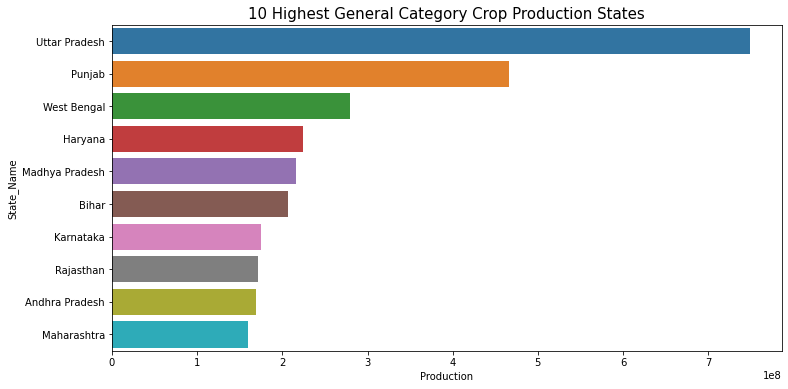

In [73]:
plt.figure(figsize=(12,6))
plt.title('10 Highest General Category Crop Production States',fontsize='15')
sns.barplot(x=gcp.Production,y=gcp.State_Name)
plt.show()

# <h4>
Conclusion:
* Uttar Pradesh in 1st position
* Punjab in 2nd position
* West Bengal in 3rd position

</h4>

In [74]:
gcp=gcp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

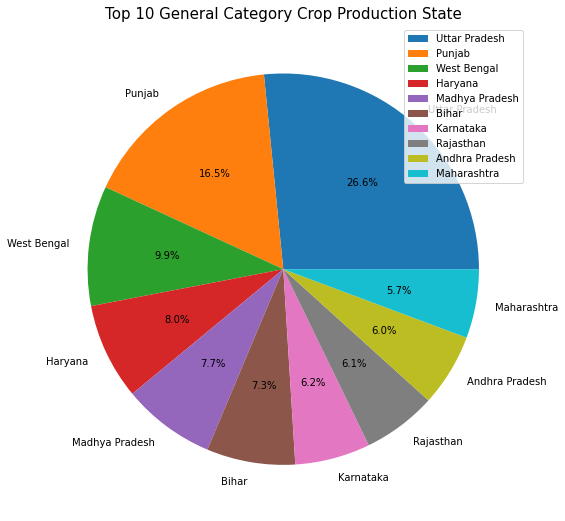

In [75]:
#using pie chart
plt.figure(figsize=(16,9))
plt.title('Top 10 General Category Crop Production State',fontsize='15')
plt.pie(gcp.Production,labels=gcp.State_Name,autopct='%0.1f%%')
plt.legend(loc='best')

plt.show()

# <h4>
Conclusion:
* Uttar Pradesh produced highest Fruits crop
* Punjab in 2nd position
* West Bengal in 3rd Position
</h4>

# <h3>2. State wise Commercial category crop production</h3>

In [76]:
ccp=df[df['Crop_Category']=='Commercial']

In [77]:
ccp

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Category
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


In [78]:
ccp=ccp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

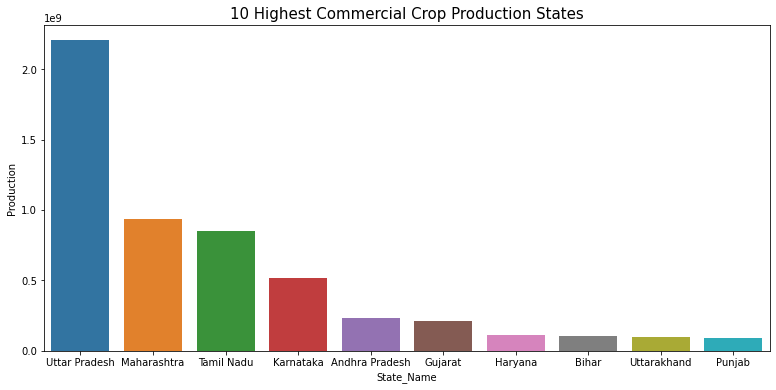

In [79]:
plt.figure(figsize=(13,6))
plt.title('10 Highest Commercial Crop Production States',fontsize='15')
sns.barplot(x=ccp.State_Name,y=ccp.Production)
plt.show()

# <h4>
Conclusion:
* Uttar Pradesh produced highest Commercial crop
* Maharastra in 2nd position
* Tamil Nadu in 3rd Position
</h4>

# <h3>3. State wise Vegetables category crop production</h3>

In [80]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Category
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,General
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [81]:
vcp=df[df['Crop_Category']=='Vegetables']

In [82]:
vcp=vcp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10).reset_index()

In [83]:
vcp

,State_Name,Production
0,Uttar Pradesh,199251475.0
1,West Bengal,155517033.0
2,Tamil Nadu,61921564.0
3,Kerala,46364550.3
4,Gujarat,36091000.0
5,Madhya Pradesh,21497001.0
6,Karnataka,20213664.0
7,Bihar,17868865.0
8,Andhra Pradesh,13788592.0
9,Assam,12169217.0


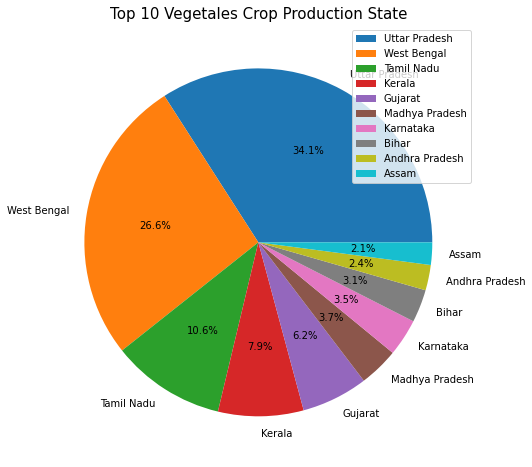

In [84]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Vegetales Crop Production State',fontsize='15')
plt.pie(vcp.Production,labels=vcp.State_Name,autopct='%0.1f%%')
plt.legend()
plt.show()

# <h4>
Conclusion:
* Uttar Pradesh produced highest Vegetables crop
* West Bengal in 2nd position
* Tamil Nadu in 3rd Position
</h4>

# <h3>4. State wise Fruits category crop production</h3>

In [85]:
fcp=df[df['Crop_Category']=='Fruits']

In [86]:
fcp=fcp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

In [87]:
fcp

,State_Name,Production
0,Tamil Nadu,59063946.00
1,Gujarat,25402100.00
2,Andhra Pradesh,20381652.00
3,Assam,14884651.00
4,Karnataka,11964471.00
5,Kerala,8187378.99
6,Madhya Pradesh,6446312.00
7,Maharashtra,4607893.00
8,Bihar,2884412.00
9,Meghalaya,1424668.00


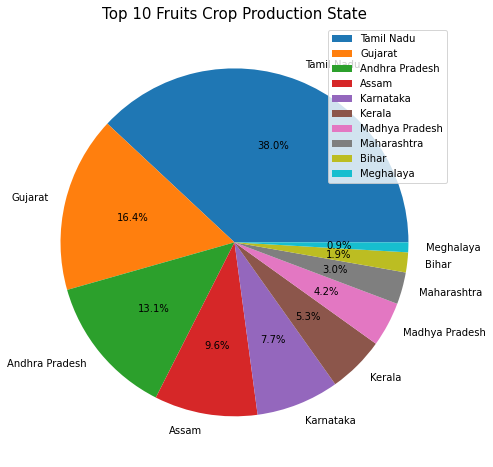

In [88]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Fruits Crop Production State',fontsize='15')
plt.pie(fcp.Production,labels=fcp.State_Name,autopct='%0.1f%%')
plt.legend()
plt.show()

# <h4>
Conclusion:
* Tamil Nadu produced highest Fruits crop
* Andhra Pradesh in 2nd position
* Gujarat in 3rd Position
</h4>

# <h3>5. State wise Pulses category crop production</h3>

In [89]:
pcp=df[df['Crop_Category']=='Pulses']

In [90]:
pcp=pcp.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)

In [91]:
pcp

,State_Name,Production
0,Madhya Pradesh,50021870.21
1,Uttar Pradesh,32371906.40
2,Maharashtra,30028580.00
3,West Bengal,16515116.00
4,Rajasthan,14664858.00
5,Andhra Pradesh,13936090.00
6,Karnataka,13806738.38
7,Gujarat,7750706.00
8,Bihar,5192461.00
9,Telangana,4130637.00


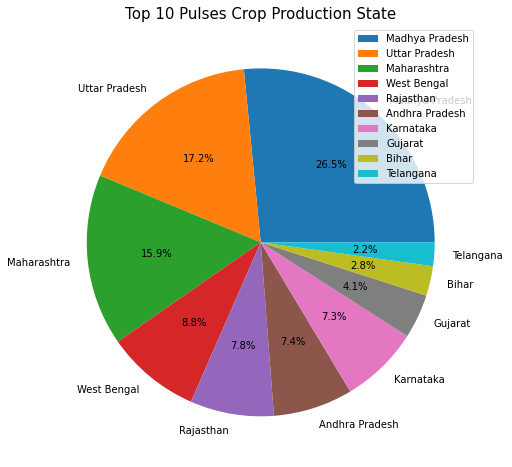

In [92]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Pulses Crop Production State',fontsize='15')
plt.pie(pcp.Production,labels=pcp.State_Name,autopct='%0.1f%%')
plt.legend()
plt.show()

# <h4>
Conclusion:
* Madhya Pradesh produced highest Pulses crop
* Uttar Pradesh in 2nd position
* Maharastra in 3rd Position
</h4>

# <center><h2>End</h2></center>